# <center>  كل ما سوف تقرؤه فهو لا يمثل الواقع بأي شكلٍ كان وليس إلا عبارةً عن فضاء غير واقعي من عالم الاحتمالات </center>
# <center> خربشات ورياضيات </center>

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(42)

In [3]:
def generator():
    '''
    This function to generating normal random sample of the tims mobility
    '''
    distribution = scipy.stats.norm(loc=11,scale=2.8)
    hours = distribution.rvs(size=1000000)
    return hours

In [4]:
day_hours= {"Sunday":generator(),"Monday":generator(),"Tuesday":generator(),"Wednesday":generator(),"Thursday":generator()}

In [5]:
# df = pd.DataFrame.from_dict(day_hours)
# df.to_csv("data.csv")
day_hours= pd.read_csv("data.csv")

In [6]:
day_hours.shape

(1000000, 6)

In [7]:
day_hours.head()

,Unnamed: 0,Sunday,Monday,Tuesday,Wednesday,Thursday
0,0,12.390800,11.473681,13.981223,7.899951,10.484784
1,1,10.612860,10.659786,9.609203,6.045786,11.122622
2,2,12.813528,14.238551,11.361929,10.054138,14.311050
3,3,15.264484,11.560240,6.856859,12.406658,10.203905
4,4,10.344371,13.420910,10.132428,12.241810,10.089570


In [8]:
day_hours.rename({"Unnamed: 0":"first"}, axis="columns", inplace=True)
day_hours.drop(["first"], axis=1, inplace=True)
day_hours.head()

,Sunday,Monday,Tuesday,Wednesday,Thursday
0,12.390800,11.473681,13.981223,7.899951,10.484784
1,10.612860,10.659786,9.609203,6.045786,11.122622
2,12.813528,14.238551,11.361929,10.054138,14.311050
3,15.264484,11.560240,6.856859,12.406658,10.203905
4,10.344371,13.420910,10.132428,12.241810,10.089570


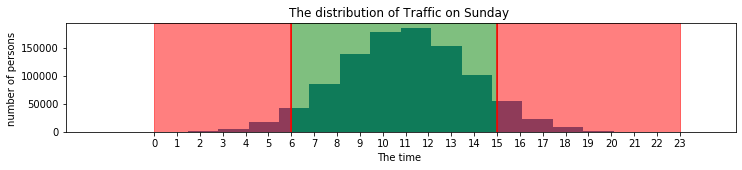

In [9]:
_=plt.figure(figsize=(12,2))
_=plt.hist(day_hours["Sunday"], bins=20)
_=plt.xticks(np.arange(0,24))
_=plt.axvline(15, color='red')
_=plt.axvline(6, color='red')
_=plt.axvspan(6, 15, alpha=0.5, color='g')
_=plt.axvspan(0, 6, alpha=0.5, color='r')
_=plt.axvspan(15, 23, alpha=0.5, color='r')
_= plt.title('The distribution of Traffic on Sunday ')
_= plt.xlabel('The time ')
_= plt.ylabel('number of persons ')
plt.show()

## <center>  الرسم البياني أعلاه يمثل الحركة الافتراضية ليوم الأحد </center>

<div style="direction:rtl">
    <font size="4">
نلاحظ في هذا الرسم البياني بالأعلى أن انتشر البيانات انتشار طبيعي حيث تتكتل ذروة البيانات حول المتوسط والذي يساوي 11 وذلك يدل على أن ذروة الإزداحام سوف تكون في الساعة 11 وقبلها بساعة وبعدها بساعة 
تمثل المنطقة الخضراء في الرسم البياني الفترة المسموح فيها بالتنقل، والمنطقة التي باللون الأحمر تمثل أوقات منع التجول إلا لضرورة، نلاحظ أنه بين الساعة 15 و 16 هناك نوع من الزحام 
وهذا إن دل دل على أن من هذا الزحام بسبب كثرة الذين يسلكون الطرق في هذه الوقت والذين لم يصلوا إلى وجهاتهم لضروف معينة مثل الحفريات وضيق بعض الأطرقة وكذلك التحويلات إن وجدت، من المحتمل أن يبدأ استعداد الناس للإنطلاق إلى شؤونهم من الساعة 5:45 دقيقة ولكن هذا قبل الوقت المسموح به ولكن من الممكن أن يكون هذا الوقت وقت التأهب للإنطلاق.
من المحتمل أن يكون سبب تزايد لزحام من الساعة 8:30 حتى الساعة 12 هو أن الكثيرين من الأشخاص الذين يذهبون للشراء في الفترة المسائية سوف يستغلون الفترة الصباحية لأن في الفترة المسائية حظر للتجول والخروج، زحام فترة التسوق سيكون من الساعة 8:30 حتى 1:30، ليس هناك زحام بسبب الموظفين والمدارس لأن أكثرهم في إجازة من الدولة.
</font>
</div>

## <center> كل ما سوف يأتي هو أفتراض أن لدينا 500000 مشوار في كل يوم من أيام العمل في أي أسبوع من أسابيع التي في فترة الحظر </center>

In [10]:
def expirment(number_of_persons):
    '''
    This function for generating some expirments of mobility.
    '''
    exper={"no":["no" for i in range(number_of_persons)],
          "id":[i for i in range(number_of_persons)],
          "Sunday":np.random.choice(day_hours["Sunday"].round(), size= number_of_persons),
          "Monday":np.random.choice(day_hours["Monday"].round(), size= number_of_persons),
          "Tuesday":np.random.choice(day_hours["Tuesday"].round(), size= number_of_persons),
          "Wednesday":np.random.choice(day_hours["Wednesday"].round(), size= number_of_persons),
          "Thursday":np.random.choice(day_hours["Thursday"].round(), size= number_of_persons)}
    df_expir= pd.DataFrame.from_dict(exper)
    return df_expir
# expirment(2)

In [11]:
'''
generating 500000 trips for any 5 work days.
'''
df= expirment(500000)
df.head()

,no,id,Sunday,Monday,Tuesday,Wednesday,Thursday
0,no,0,12.0,7.0,9.0,8.0,14.0
1,no,1,11.0,14.0,14.0,14.0,9.0
2,no,2,10.0,10.0,12.0,9.0,9.0
3,no,3,13.0,10.0,10.0,13.0,11.0
4,no,4,13.0,10.0,14.0,15.0,14.0


In [12]:
df['expirment_no']=df.no.astype(str).str.cat(df.id.astype(str), sep='-')
df.head()

,no,id,Sunday,Monday,Tuesday,Wednesday,Thursday,expirment_no
0,no,0,12.0,7.0,9.0,8.0,14.0,no-0
1,no,1,11.0,14.0,14.0,14.0,9.0,no-1
2,no,2,10.0,10.0,12.0,9.0,9.0,no-2
3,no,3,13.0,10.0,10.0,13.0,11.0,no-3
4,no,4,13.0,10.0,14.0,15.0,14.0,no-4


In [13]:
df.drop('no', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)
df.head()

,Sunday,Monday,Tuesday,Wednesday,Thursday,expirment_no
0,12.0,7.0,9.0,8.0,14.0,no-0
1,11.0,14.0,14.0,14.0,9.0,no-1
2,10.0,10.0,12.0,9.0,9.0,no-2
3,13.0,10.0,10.0,13.0,11.0,no-3
4,13.0,10.0,14.0,15.0,14.0,no-4


In [14]:
df = df[['expirment_no', 'Sunday','Monday','Tuesday','Wednesday','Thursday']]
df.head()

,expirment_no,Sunday,Monday,Tuesday,Wednesday,Thursday
0,no-0,12.0,7.0,9.0,8.0,14.0
1,no-1,11.0,14.0,14.0,14.0,9.0
2,no-2,10.0,10.0,12.0,9.0,9.0
3,no-3,13.0,10.0,10.0,13.0,11.0
4,no-4,13.0,10.0,14.0,15.0,14.0


In [15]:
len(df)

500000

In [16]:
def update_minutes(d):
    '''
    This function for setting the minutes
    '''
    rand_minutes = np.random.choice(np.arange(0.1,0.6,0.01), size=len(df))
    d+= rand_minutes
    return (d)
    

In [17]:
df['Sunday']= update_minutes(df['Sunday'])
df['Monday']= update_minutes(df['Monday'])
df['Tuesday']= update_minutes(df['Tuesday'])
df['Wednesday']= update_minutes(df['Wednesday'])
df['Thursday']= update_minutes(df['Thursday'])

In [18]:
df.head()

,expirment_no,Sunday,Monday,Tuesday,Wednesday,Thursday
0,no-0,12.20,7.47,9.36,8.50,14.56
1,no-1,11.54,14.46,14.56,14.10,9.57
2,no-2,10.38,10.23,12.21,9.15,9.32
3,no-3,13.47,10.28,10.18,13.38,11.51
4,no-4,13.19,10.30,14.48,15.48,14.19


In [19]:
def ecdf(data):
    '''
    The cumulative distribution function gives you the cumulative probability associated with a function. 
    It is a similar concept to a cumulative frequency table. With a table, the frequency is the amount of 
    times a particular number or item happens. The cumulative frequency is the total counts up to a certain number.
    source : https://www.statisticshowto.datasciencecentral.com/cumulative-distribution-function/
    
    input: 
            column of dataset.
    
    output:
            - x: sotring x values.
            - y: the probability that an observation will be greater than 
                 a certain value, or between two values sourse:
                 https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/basic-statistics/probability-distributions/supporting-topics/basics/using-the-cumulative-distribution-function-cdf/
    '''
    n= len(data)
    x= np.sort(data)
    y= np.arange(1, n+1)/n
    
    return x,y

In [20]:
def Probability(data):
    '''
    
    '''
    siz= np.unique(data.values)
    for i in siz:
        print('P(',i, ') = ', np.count_nonzero(data == i)/np.size(data)*100)

# <center>  الإحــتــمـالات </center>

<div style="direction:rtl">
    <font size="4">
    سوف نأخذ أي يوم على سبيل المثال الأحد
    </font>
</div>

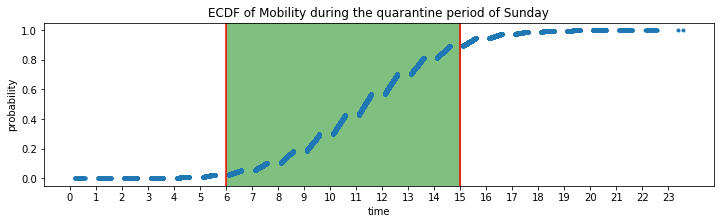

In [21]:
_=plt.figure(figsize=(12,3))
x,y= ecdf(df[(df['Sunday']>= 0 )& (df['Sunday']< 24)]['Sunday'])
_=plt.plot(x,y, marker='.', linestyle='none')
_=plt.xticks(np.arange(0,24))
_=plt.axvline(15, color='red')
_=plt.axvline(6, color='red')
_=plt.axvspan(6, 15, alpha=0.5, color='g')
_= plt.title('ECDF of Mobility during the quarantine period of Sunday')
_= plt.xlabel('time')
_= plt.ylabel('probability')
plt.show()

In [22]:
bins= np.arange(0,24)
Bins_of_data= pd.cut(df[(df['Sunday']>= 0 )| (df['Sunday']< 24)]['Sunday'], bins)
Bins_of_data.dropna(inplace=True)

In [23]:
Probability(Bins_of_data.sort_values())

P( (0, 1] ) =  0.0072001728041472994
P( (1, 2] ) =  0.022800547213133116
P( (2, 3] ) =  0.08300199204780916
P( (3, 4] ) =  0.2826067825627815
P( (4, 5] ) =  0.648015552373257
P( (5, 6] ) =  1.4830355928542285
P( (6, 7] ) =  2.9090698176756242
P( (7, 8] ) =  5.179724313383521
P( (8, 9] ) =  8.090394169460067
P( (9, 10] ) =  11.00946422714145
P( (10, 11] ) =  13.20871700920822
P( (11, 12] ) =  14.14933958415002
P( (12, 13] ) =  13.342720225285406
P( (13, 14] ) =  10.911261870284887
P( (14, 15] ) =  8.051393233437603
P( (15, 16] ) =  5.198724769394465
P( (16, 17] ) =  2.9102698464763153
P( (17, 18] ) =  1.486635679256302
P( (18, 19] ) =  0.6606158547805148
P( (19, 20] ) =  0.24960599054377305
P( (20, 21] ) =  0.08360200644815476
P( (21, 22] ) =  0.025400609614630754
P( (22, 23] ) =  0.0064001536036864875


<div style="direction:rtl">
    <font size="4">
    في النظام الجديد سيكون وقت الذروة من الساعة 6 صباحاً حتى 15 عصراً وهو الوقت الذي سيكون فيه زحام شديد في الطرقات وهذا شيء بديهي.
    <ul>
  <li>
من هذه البيانات بيتبن لنا أن نسبة احتمالية الخروج  من الساعة 6 صباحا حتى 15 عصراً تساوي 86% وهي تساوي 430000 مشوار وخروج إلى الشوارع لإستغلال فترة السماح هذه لقضاء الاحتياجات اليومية أو القيام الأعمال اللازمة.  
</li>
    <li>
    احتمالية خروج في الوقت من الساعة 15 عصراً حتى 12 منصف الليل تساوي تقريباً 10.6% وبالعادة هم من لديهم عمل في الفترة المسائية أو لديهم ضروف طارئة تجبرهم على الخروج، ومنهم من تأخر في الوصول أثناء خروج موظفي الشركات العاملة، وبعض القطاعات العسكرية.
</li>
    <li>
    احتمالية الخروج من الساعة 12 بعد منتصف الليل إلى قبل الساعة 6 صباحاً تساوي 0.03% . 
       </li>
    <li>
فترة الزحام الشديد من الساعة 8 صباحاً حتى 12 ظهراً احتمالية الخروج في هذا الوقت تساوي 46% وتساوي 230000 مشوار. 
    </li>
    
    
</ul>
</font>
</div>

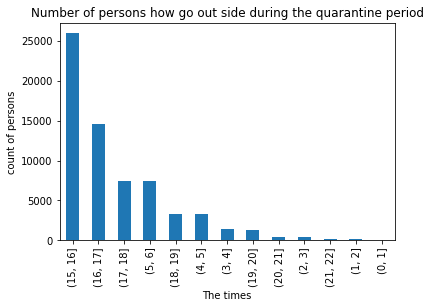

In [24]:
bins = np.arange(0,24)
ax= pd.cut(df[(df['Sunday']< 6 )| (df['Sunday']> 15)]['Sunday'], bins).value_counts()[:13].plot(kind='bar', title='Number of persons how go out side during the quarantine period')
ax.set_xlabel("The times")
ax.set_ylabel("count of persons");